# Exploratory Analysis of the Ames dataset

In [1]:
import pathlib
import pickle

import matplotlib.pyplot as plt
import pandas as pd

It is a good idea to define a variable for the base data directory, and to construct the exact filenames from that variable. Another good idea is to use the `pathlib` library for manipulating paths in Python, as it will make your code work in both Windows and Linux/MacOS.

In [2]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
print(DATA_DIR)

C:\Users\naticarreras\OneDrive - Insper - Institudo de Ensino e Pesquisa\6° SEMESTRE\MACHINE LEARNING\AULA 2\Machine-Learning\data


## Before we begin

Let's read the data, check if things appear ok (if we at least read the data), list the columns and their data type, and correct their types in Pandas.

### Reading the data, sanity checks

Check the size of the file for good measure.

In [3]:
raw_data_path = DATA_DIR / 'raw' / 'ames.csv'
print(raw_data_path)

C:\Users\naticarreras\OneDrive - Insper - Institudo de Ensino e Pesquisa\6° SEMESTRE\MACHINE LEARNING\AULA 2\Machine-Learning\data\raw\ames.csv


In [4]:
filesize = raw_data_path.stat().st_size
print(filesize)
print(f'This file has {filesize} bytes')

1182303
This file has 1182303 bytes


All good, let's read the file.

In [5]:
raw_data = pd.read_csv(raw_data_path)

Check the number of rows and columns, and print a few samples to see if the reading went well.

In [6]:
raw_data.shape

(2930, 82)

In [43]:
raw_data.head()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Analyze the column types

From now on, `raw_data` is untouchable. Make a copy of `raw_data`:

In [8]:
data = raw_data.copy()

Let's see the columns and types:

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   MS.SubClass      2930 non-null   category
 1   MS.Zoning        2930 non-null   category
 2   Lot.Frontage     2440 non-null   float64 
 3   Lot.Area         2930 non-null   float64 
 4   Street           2930 non-null   category
 5   Alley            198 non-null    category
 6   Lot.Shape        2930 non-null   category
 7   Land.Contour     2930 non-null   category
 8   Utilities        2930 non-null   category
 9   Lot.Config       2930 non-null   category
 10  Land.Slope       2930 non-null   category
 11  Neighborhood     2930 non-null   category
 12  Condition.1      2930 non-null   category
 13  Condition.2      2930 non-null   category
 14  Bldg.Type        2930 non-null   category
 15  House.Style      2930 non-null   category
 16  Overall.Qual     2930 non-null   category


Pay attention to the various types of data:

- `int64`: integer-valued variable. May be a categorical variable (when the integer number actually represents a non-ordered category) or a numerical variable (it should have been a `float64` instead).
- `float64`: real-valued variable.
- `object`: a generic object in Pandas - could be a list, a dictionary, an object from a complicated class, etc. But if your DataFrame was just read from a CSV file, then the `object` type actually refers to a _string_ (type `str`). Usually represents a categorical variable but be careful - sometimes we have ordinal variables, where the categories actually have an ordering. Ordinal variables may be modeled as categorical or converted to numerical, and it is not always clear which approach is better.

In [10]:
data.dtypes.value_counts()

object     43
int64      28
float64    11
dtype: int64

Go back to the documentation for this dataset and analyze the columns. The documentation is well written, and it is an example of how to document variables. Notice that the file describes the variables by meaningful groups, somehow: 

- `Order` and `PID` are line identifiers, and should have no bearing on house price prediction.

- The next set of variable relates to the conditions of the surroundings of the house: `MS.SubClass`, `MS.Zoning`, `Lot.Frontage`, `Lot.Area`, `Street`, `Alley`, `Lot.Shape`, `Land.Contour`, `Utilities`, `Lot.Config`, `Land.Slope`, `Neighborhood`, `Condition.1`, `Condition.2`.
- After that, the documentation presents the (quite extensive) list of features of the house: `Bldg.Type`, `House.Style`, `Overall.Qual`, `Overall.Cond`, `Year.Built`, `Year.Remod.Add`, `Roof.Style`, `Roof.Matl`, `Exterior.1st`, `Exterior.2nd`, `Mas.Vnr.Type`, `Mas.Vnr.Area`, `Exter.Qual`, `Exter.Cond`, `Foundation`, `Bsmt.Qual`, `Bsmt.Cond`, `Bsmt.Exposure`, `BsmtFin.Type.1`, `BsmtFin.SF.1`, `BsmtFin.Type.2`, `BsmtFin.SF.2`, `Bsmt.Unf.SF`, `Total.Bsmt.SF`, `Heating`, `Heating.QC`, `Central.Air`, `Electrical`, `X1st.Flr.SF`, `X2nd.Flr.SF`, `Low.Qual.Fin.SF`, `Gr.Liv.Area`, `Bsmt.Full.Bath`, `Bsmt.Half.Bath`, `Full.Bath`, `Half.Bath`, `Bedroom.AbvGr`, `Kitchen.AbvGr`, `Kitchen.Qual`, `TotRms.AbvGrd`, `Functional`, `Fireplaces`, `Fireplace.Qu`, `Garage.Type`, `Garage.Yr.Blt`, `Garage.Finish`, `Garage.Cars`, `Garage.Area`, `Garage.Qual`, `Garage.Cond`, `Paved.Drive`, `Wood.Deck.SF`, `Open.Porch.SF`, `Enclosed.Porch`, `X3Ssn.Porch`, `Screen.Porch`, `Pool.Area`, `Pool.QC`, `Fence`, `Misc.Feature`, `Misc.Val`.
- Finally, attributes related to the sale are given: `Mo.Sold`, `Yr.Sold`, `Sale.Type`, `Sale.Condition`, `SalePrice`.

Make a list of all categorical, ordinal, continuous, and discrete variables (and the two variables to ignore). Follow the documentation.

In [11]:
ignore_variables = [
    'Order',
    'PID',
]

continuous_variables = [
    'Lot.Frontage',
    'Lot.Area',
    'Mas.Vnr.Area',
    'BsmtFin.SF.1',
    'BsmtFin.SF.2',
    'Bsmt.Unf.SF',
    'Total.Bsmt.SF',
    'X1st.Flr.SF',
    'X2nd.Flr.SF',
    'Low.Qual.Fin.SF',
    'Gr.Liv.Area',
    'Garage.Area',
    'Wood.Deck.SF',
    'Open.Porch.SF',
    'Enclosed.Porch',
    'X3Ssn.Porch',
    'Screen.Porch',
    'Pool.Area',
    'Misc.Val',
    'SalePrice',
]

discrete_variables = [
    'Year.Built',
    'Year.Remod.Add',
    'Bsmt.Full.Bath',
    'Bsmt.Half.Bath',
    'Full.Bath',
    'Half.Bath',
    'Bedroom.AbvGr',
    'Kitchen.AbvGr',
    'TotRms.AbvGrd',
    'Fireplaces',
    'Garage.Yr.Blt',
    'Garage.Cars',
    'Mo.Sold',
    'Yr.Sold',
]

ordinal_variables = [
    'Lot.Shape',
    'Utilities',
    'Land.Slope',
    'Overall.Qual',
    'Overall.Cond',
    'Exter.Qual',
    'Exter.Cond',
    'Bsmt.Qual',
    'Bsmt.Cond',
    'Bsmt.Exposure',
    'BsmtFin.Type.1',
    'BsmtFin.Type.2',
    'Heating.QC',
    'Electrical',
    'Kitchen.Qual',
    'Functional',
    'Fireplace.Qu',
    'Garage.Finish',
    'Garage.Qual',
    'Garage.Cond',
    'Paved.Drive',
    'Pool.QC',
    'Fence',
]

categorical_variables = [
    'MS.SubClass',
    'MS.Zoning',
    'Street',
    'Alley',
    'Land.Contour',
    'Lot.Config',
    'Neighborhood',
    'Condition.1',
    'Condition.2',
    'Bldg.Type',
    'House.Style',
    'Roof.Style',
    'Roof.Matl',
    'Exterior.1st',
    'Exterior.2nd',
    'Mas.Vnr.Type',
    'Foundation',
    'Heating',
    'Central.Air',
    'Garage.Type',
    'Misc.Feature',
    'Sale.Type',
    'Sale.Condition',
]

Drop the droppable variables:

In [12]:
data.drop(columns=['Order', 'PID'], inplace=True)

Now let's perform a first attempt to correct the data types for the given variables, setting the types as:

- continuous: `float64`
- categorical: `category`
- ordinal: This is the difficult one, it has to be of type `category`, but we need to define the order. One-by-one.
- discrete: Let's also set it as being of type `category`, but at least the ordering of the categories is obvious.

In [13]:
for col in continuous_variables:
    data[col] = data[col].astype('float64')

In [49]:
for col in categorical_variables:
    data[col] = data[col].astype('category')

In [15]:
for col in discrete_variables:
    data[col] = data[col].astype('category').cat.as_ordered()

In [50]:
data["Misc.Feature"].astype('binary')

TypeError: data type 'binary' not understood

Now the painful one...

In [16]:
data[ordinal_variables].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Lot.Shape       2930 non-null   object
 1   Utilities       2930 non-null   object
 2   Land.Slope      2930 non-null   object
 3   Overall.Qual    2930 non-null   int64 
 4   Overall.Cond    2930 non-null   int64 
 5   Exter.Qual      2930 non-null   object
 6   Exter.Cond      2930 non-null   object
 7   Bsmt.Qual       2850 non-null   object
 8   Bsmt.Cond       2850 non-null   object
 9   Bsmt.Exposure   2847 non-null   object
 10  BsmtFin.Type.1  2850 non-null   object
 11  BsmtFin.Type.2  2849 non-null   object
 12  Heating.QC      2930 non-null   object
 13  Electrical      2929 non-null   object
 14  Kitchen.Qual    2930 non-null   object
 15  Functional      2930 non-null   object
 16  Fireplace.Qu    1508 non-null   object
 17  Garage.Finish   2771 non-null   object
 18  Garage.Q

Attention to the `Overall.Qual` and `Overall.Cond` columns, their original values are integers, enter them accordingly. 

Also, some variables are said to have the category `NA` for situations when a feature is not available (e.g. condition of the basement when there is no basement). But, in reality, these occurences have been represented by the Pandas reading function as the Python constant `None`, correctly indicating that there is no value there. Therefore, you don't need to encode the `NA` category, it does not exist in our dataset.

In [17]:
category_orderings = {
    'Lot.Shape': [
        'Reg',
        'IR1',
        'IR2',
        'IR3',
    ],
    'Utilities': [
        'AllPub',
        'NoSewr',
        'NoSeWa',
        'ELO',
    ],
    'Land.Slope': [
        'Gtl',
        'Mod',
        'Sev',
    ],
    'Overall.Qual': [
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
    ],
    'Overall.Cond': [
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
    ],
    'Exter.Qual': [
        'Ex',
        'Gd',
        'TA',
        'Fa',
        'Po',
    ],
    'Exter.Cond': [
        'Ex',
        'Gd',
        'TA',
        'Fa',
        'Po',
    ],
    'Bsmt.Qual': [
        'Ex',
        'Gd',
        'TA',
        'Fa',
        'Po',
    ],
    'Bsmt.Cond': [
        'Ex',
        'Gd',
        'TA',
        'Fa',
        'Po',
    ],
    'Bsmt.Exposure': [
        'Gd',
        'Av',
        'Mn',
        'No',
        'NA',
    ],
    'BsmtFin.Type.1': [
        'GLQ',
        'ALQ',
        'BLQ',
        'Rec',
        'LwQ',
        'Unf',
    ],
    'BsmtFin.Type.2': [
        'GLQ',
        'ALQ',
        'BLQ',
        'Rec',
        'LwQ',
        'Unf',
    ],
    'Heating.QC': [
        'Ex',
        'Gd',
        'TA',
        'Fa',
        'Po',
    ],
    'Electrical': [
        'SBrkr',
        'FuseA',
        'FuseF',
        'FuseP',
        'Mix',
    ],
    'Kitchen.Qual': [
        'Ex',
        'Gd',
        'TA',
        'Fa',
        'Po',
    ],
    'Functional': [
        'Typ',
        'Min1',
        'Min2',
        'Mod',
        'Maj1',
        'Maj2',
        'Sev',
        'Sal',
    ],
    'Fireplace.Qu': [
        'Ex',
        'Gd',
        'TA',
        'Fa',
        'Po',
    ],
    'Garage.Finish': [
        'Fin',
        'RFn',
        'Unf',
    ],
    'Garage.Qual': [
        'Ex',
        'Gd',
        'TA',
        'Fa',
        'Po',
    ],
    'Garage.Cond': [
        'Ex',
        'Gd',
        'TA',
        'Fa',
        'Po',    
    ],
    'Paved.Drive': [
        'Y',
        'P',
        'N',
    ],
    'Pool.QC': [
        'Ex',
        'Gd',
        'TA',
        'Fa',
    ],
    'Fence': [
        'GdPrv',
        'MnPrv',
        'GdWo',
        'MnWw',
    ],
}


In [18]:
for col, orderings in category_orderings.items():
    data[col] = data[col] \
        .astype('category') \
        .cat \
        .set_categories(orderings, ordered=True)

### Check the variable summaries using `.describe()`

Now that our variables are painstakingly organized, with proper types, let's see a summary of each. The Pandas `DataFrame` method `.describe()` is smart: it will provide a summary that is appropriate for the type of variable if all columns are categorical or all are numerical. Use `.select_dtypes()` to select only categoricals or numericals.

In [19]:
data \
    .select_dtypes('category') \
    .describe() \
    .transpose() \
    .sort_values(by='count', ascending=True)

,count,unique,top,freq
Pool.QC,13,4,Ex,4
Misc.Feature,106,5,Shed,95
Alley,198,2,Grvl,120
Fence,572,4,MnPrv,330
Fireplace.Qu,1508,5,Gd,744
Garage.Cond,2771,5,TA,2665
Garage.Qual,2771,5,TA,2615
Garage.Finish,2771,3,Unf,1231
Garage.Yr.Blt,2771.0,103.0,2005.0,142.0
Garage.Type,2773,6,Attchd,1731


In [20]:
data \
    .select_dtypes('number') \
    .describe() \
    .transpose() \
    .sort_values(by='count', ascending=True)

,count,mean,std,min,25%,50%,75%,max
Lot.Frontage,2440.0,69.224590,23.365335,21.0,58.00,68.0,80.00,313.0
Mas.Vnr.Area,2907.0,101.896801,179.112611,0.0,0.00,0.0,164.00,1600.0
BsmtFin.SF.1,2929.0,442.629566,455.590839,0.0,0.00,370.0,734.00,5644.0
BsmtFin.SF.2,2929.0,49.722431,169.168476,0.0,0.00,0.0,0.00,1526.0
Bsmt.Unf.SF,2929.0,559.262547,439.494153,0.0,219.00,466.0,802.00,2336.0
Total.Bsmt.SF,2929.0,1051.614544,440.615067,0.0,793.00,990.0,1302.00,6110.0
Garage.Area,2929.0,472.819734,215.046549,0.0,320.00,480.0,576.00,1488.0
Pool.Area,2930.0,2.243345,35.597181,0.0,0.00,0.0,0.00,800.0
Screen.Porch,2930.0,16.002048,56.087370,0.0,0.00,0.0,0.00,576.0
X3Ssn.Porch,2930.0,2.592491,25.141331,0.0,0.00,0.0,0.00,508.0


### Save the data with the correct types

Make a directory `processed` in the `data` folder of our project, save your processed dataframe there.

In [21]:
processed_dir = DATA_DIR / 'processed'
processed_dir.mkdir(parents=True, exist_ok=True)

Let's save the data as `pickle`, it's simpler. 

IMPORTANT NOTE: when saving data that you expect to last for many years, choose a simpler and more stable format - despite the myriad of file types, the good-ole CSV still stands.

In [22]:
processed_file_path = processed_dir / 'ames_with_correct_types.pkl'

In [23]:
with open(processed_file_path, 'wb') as file:
    pickle.dump(
        [
            data,
            continuous_variables,
            discrete_variables,
            ordinal_variables,
            categorical_variables,
        ],
        file,
    )


Now we are ready to start analyzing this data!

## Analyzing the columns individually

Let's load the data from the previous section - this way we don't need to re-run all of the previous data adjusting:

In [24]:
processed_file_path = DATA_DIR / 'processed' / 'ames_with_correct_types.pkl'

with open(processed_file_path, 'rb') as file:
    (
        data,
        continuous_variables,
        discrete_variables,
        ordinal_variables,
        categorical_variables,
    ) = pickle.load(file)


### Analyzing the categorical variables

In [25]:
summary = data[categorical_variables] \
    .describe() \
    .transpose() \
    .sort_values(by='count')

summary

,count,unique,top,freq
Misc.Feature,106,5,Shed,95
Alley,198,2,Grvl,120
Garage.Type,2773,6,Attchd,1731
Mas.Vnr.Type,2907,5,None,1752
MS.SubClass,2930,16,20,1079
Central.Air,2930,2,Y,2734
Heating,2930,6,GasA,2885
Foundation,2930,6,PConc,1310
Exterior.2nd,2930,17,VinylSd,1015
Exterior.1st,2930,16,VinylSd,1026


In [ ]:
for col, val in summary

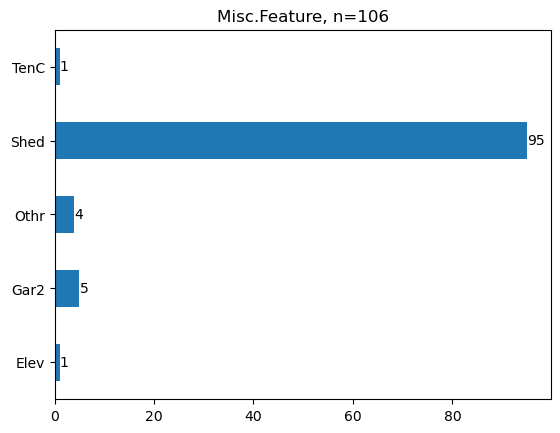

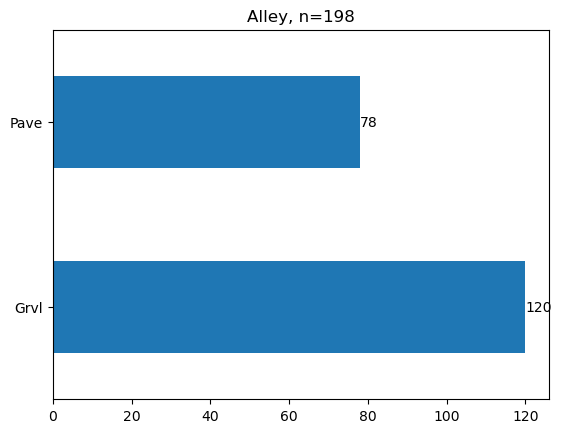

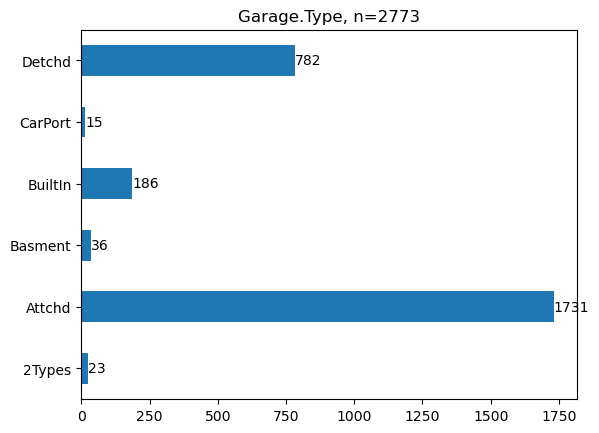

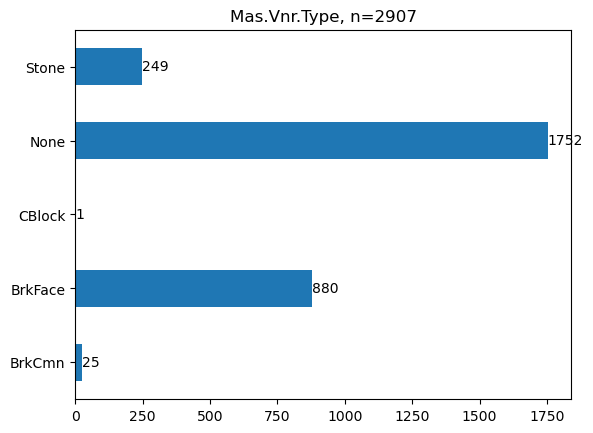

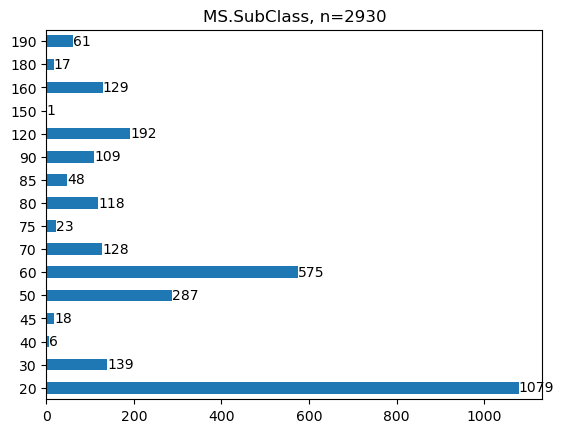

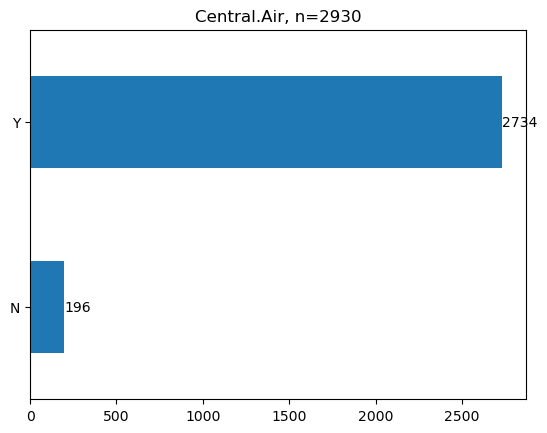

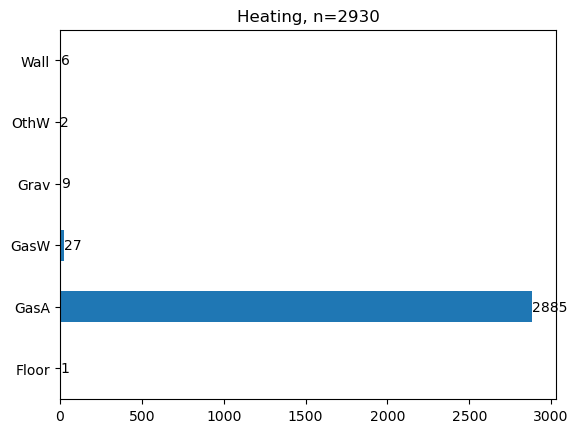

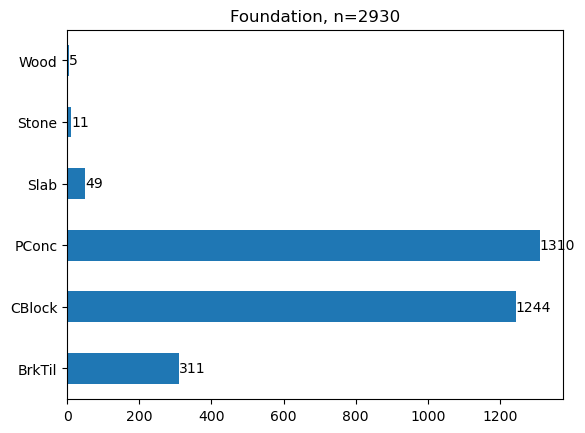

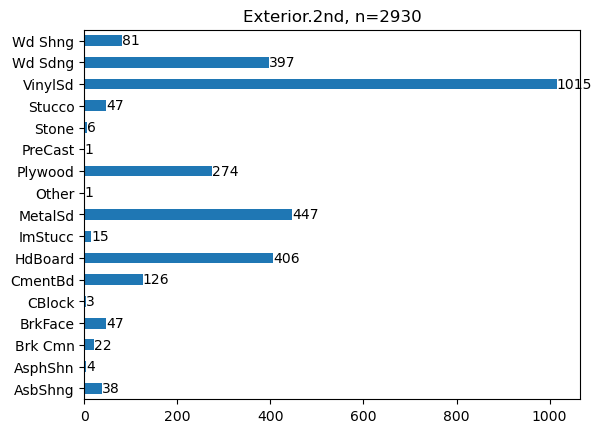

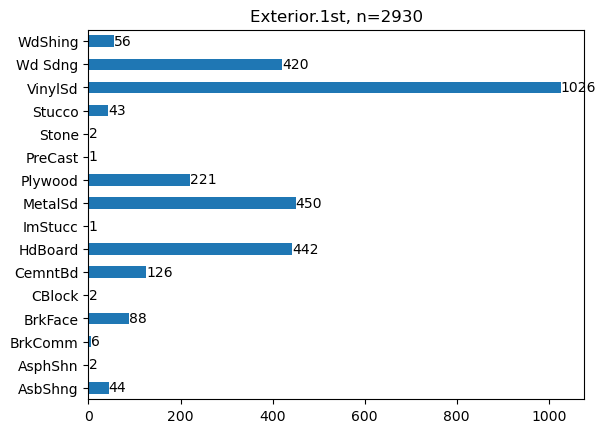

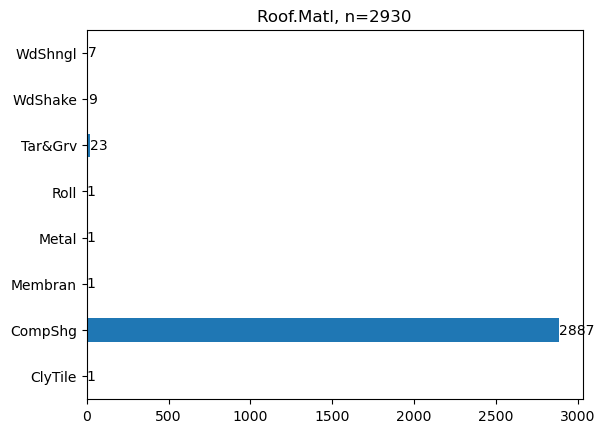

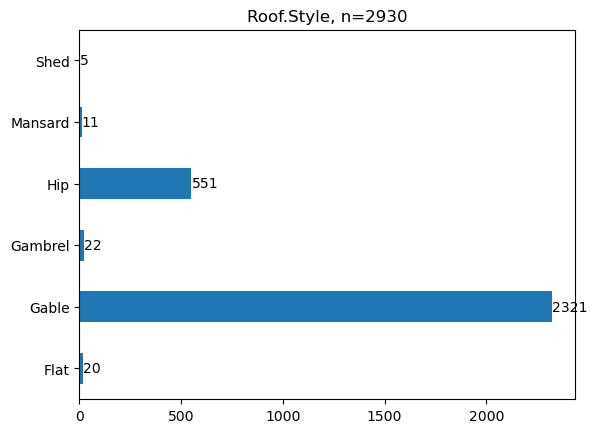

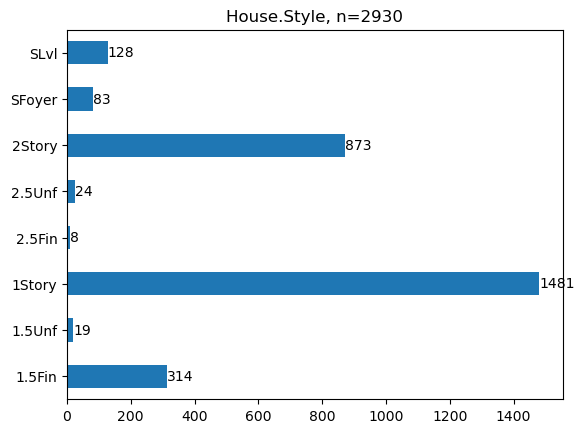

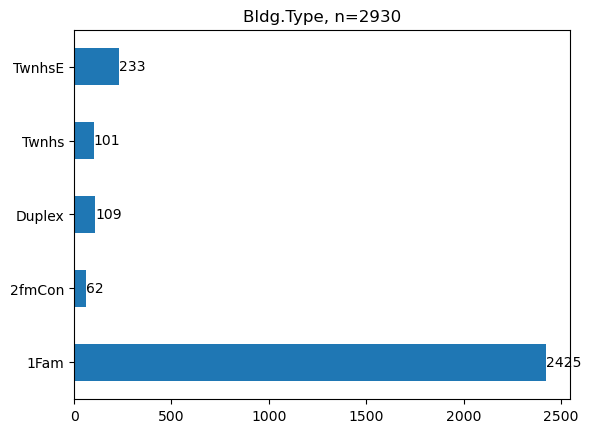

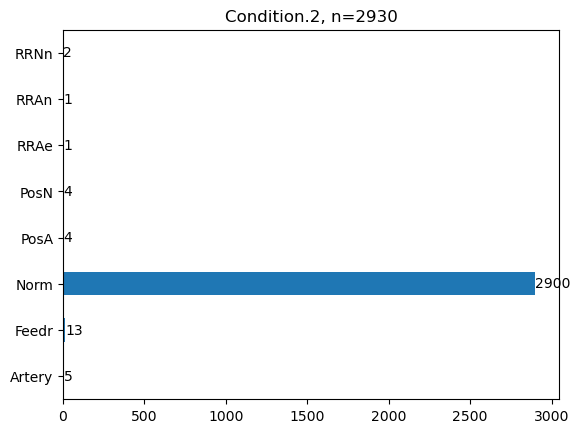

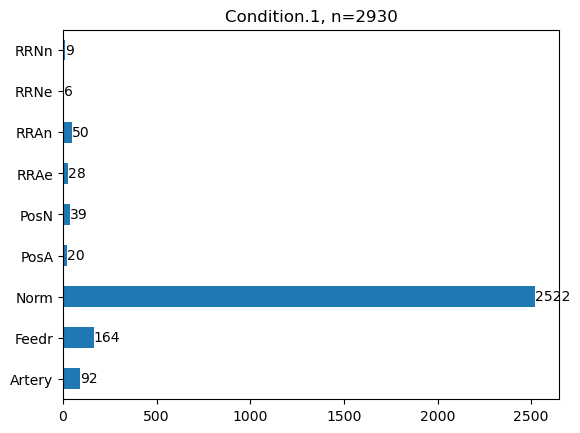

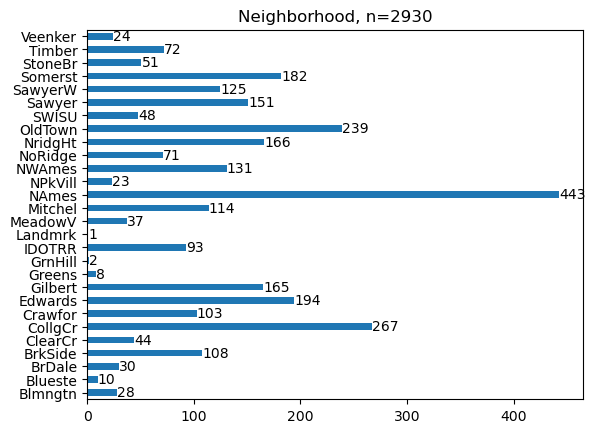

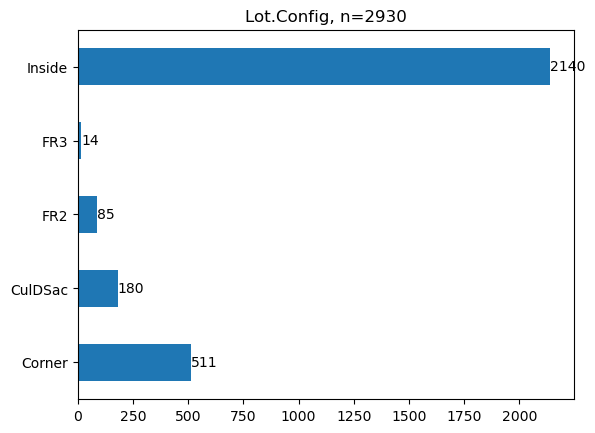

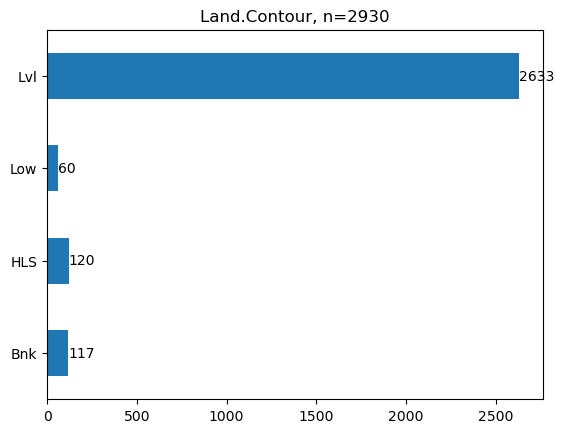

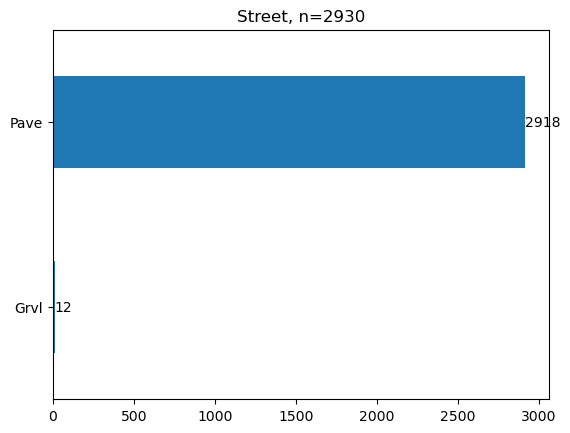

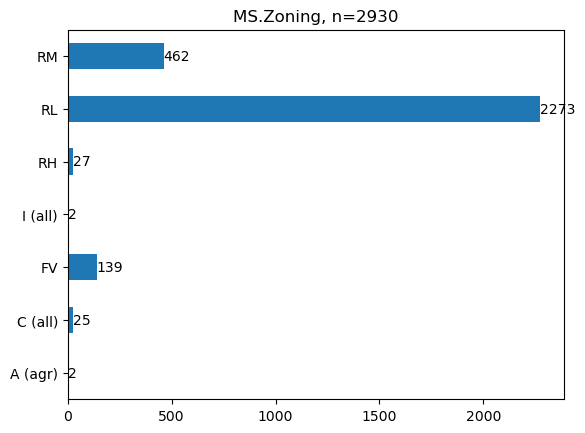

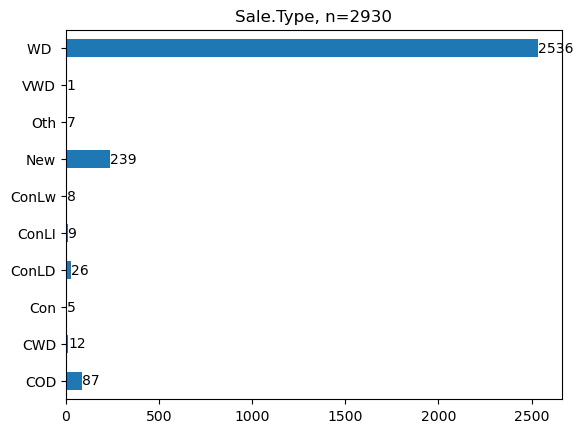

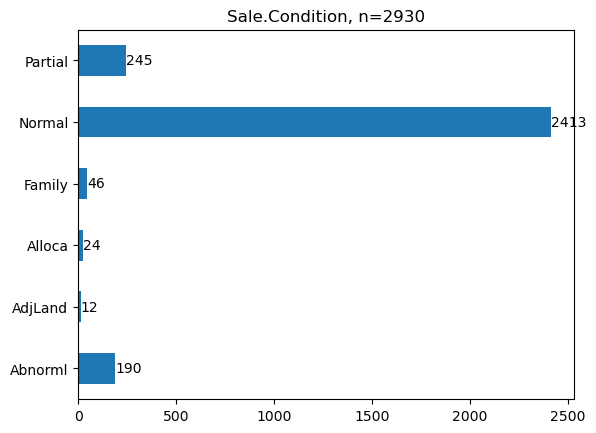

In [26]:
for col, val in summary['count'].items():
    plt.figure()
    ax = data[col].value_counts().sort_index().plot.barh()
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f'{col}, n={int(val)}')
    plt.show()

### Analyzing the continuous variables

In [27]:
summary = data[continuous_variables] \
    .describe() \
    .transpose() \
    .sort_values(by='count')

summary

,count,mean,std,min,25%,50%,75%,max
Lot.Frontage,2440.0,69.224590,23.365335,21.0,58.00,68.0,80.00,313.0
Mas.Vnr.Area,2907.0,101.896801,179.112611,0.0,0.00,0.0,164.00,1600.0
BsmtFin.SF.1,2929.0,442.629566,455.590839,0.0,0.00,370.0,734.00,5644.0
BsmtFin.SF.2,2929.0,49.722431,169.168476,0.0,0.00,0.0,0.00,1526.0
Bsmt.Unf.SF,2929.0,559.262547,439.494153,0.0,219.00,466.0,802.00,2336.0
Total.Bsmt.SF,2929.0,1051.614544,440.615067,0.0,793.00,990.0,1302.00,6110.0
Garage.Area,2929.0,472.819734,215.046549,0.0,320.00,480.0,576.00,1488.0
Pool.Area,2930.0,2.243345,35.597181,0.0,0.00,0.0,0.00,800.0
Screen.Porch,2930.0,16.002048,56.087370,0.0,0.00,0.0,0.00,576.0
X3Ssn.Porch,2930.0,2.592491,25.141331,0.0,0.00,0.0,0.00,508.0


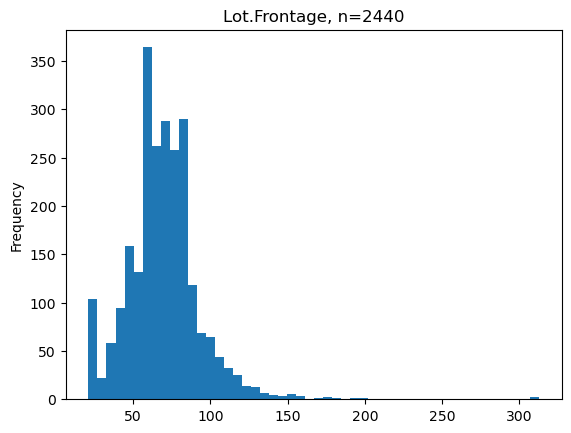

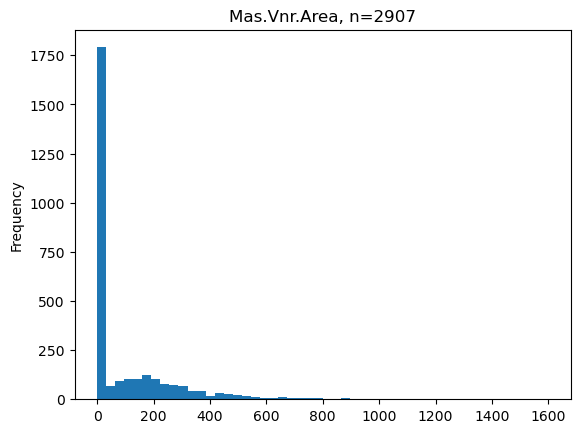

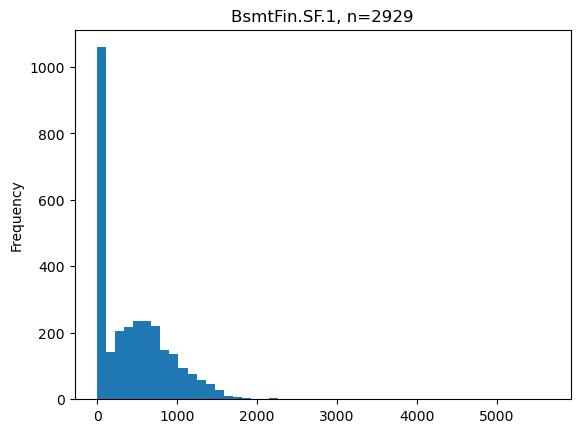

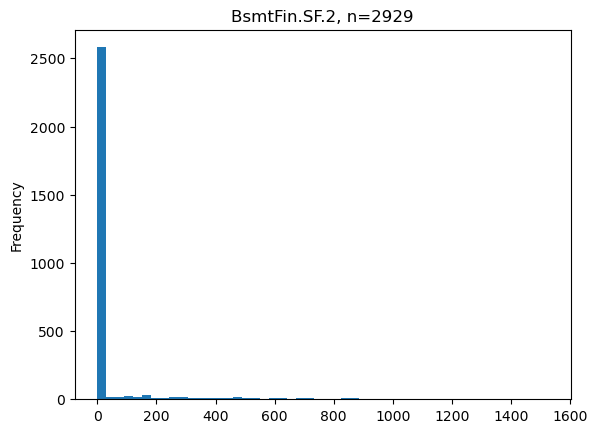

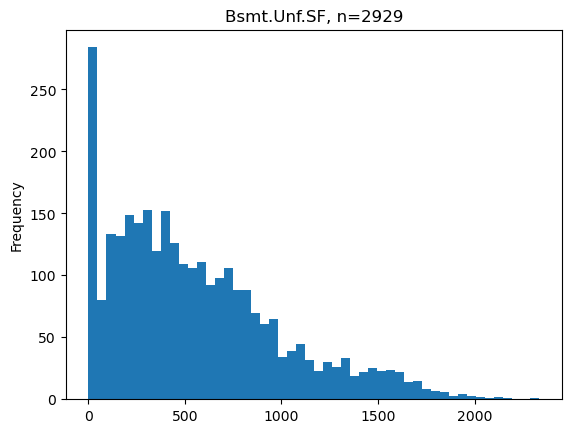

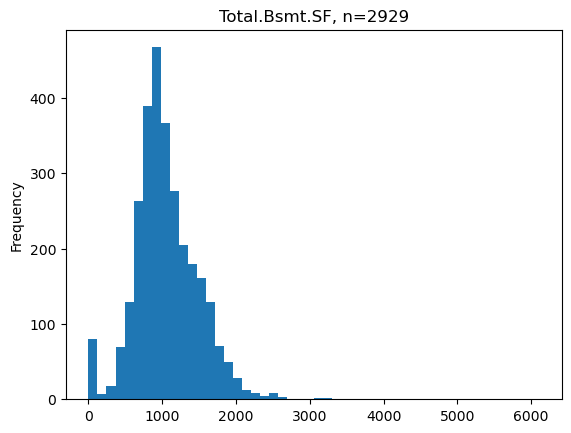

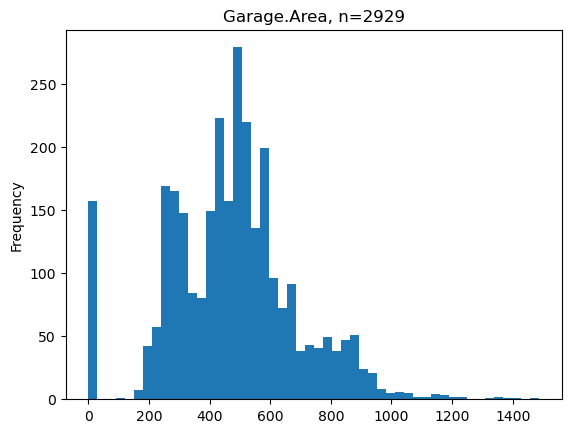

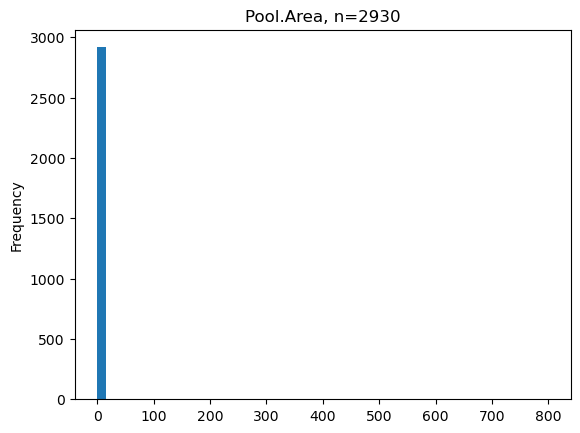

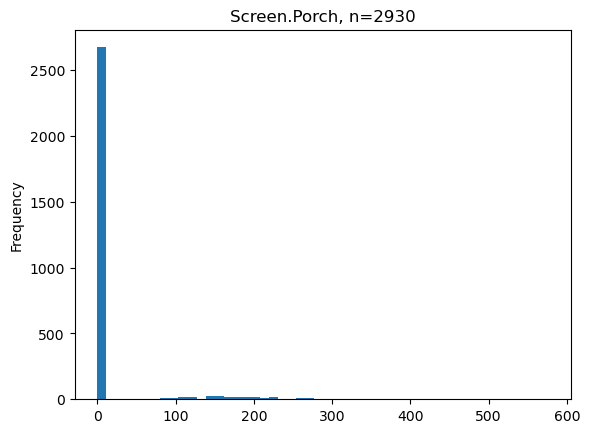

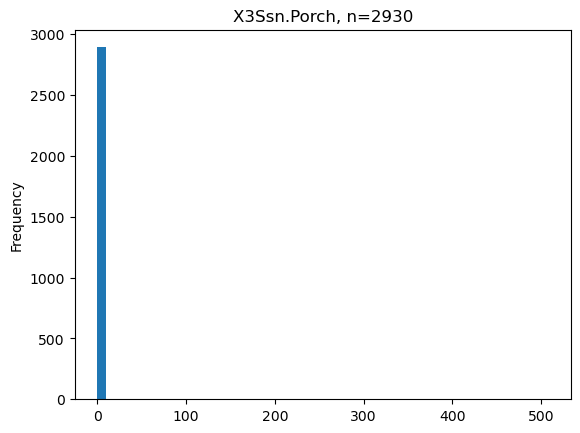

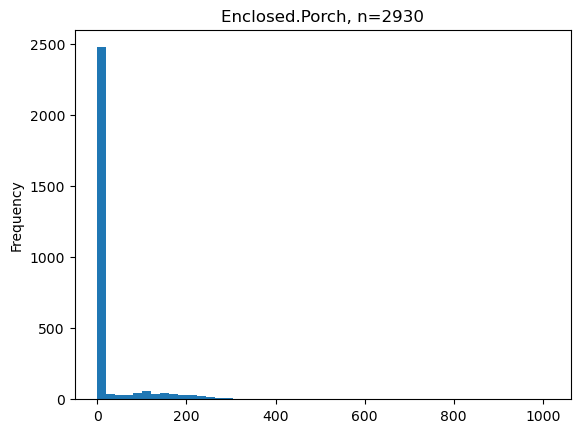

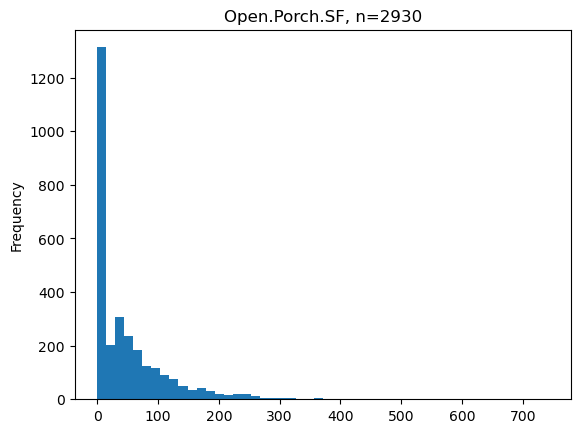

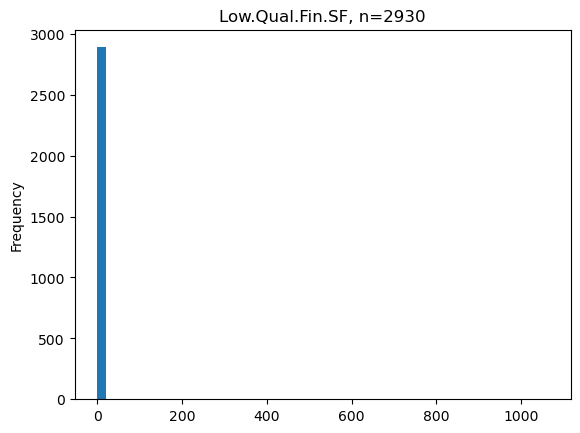

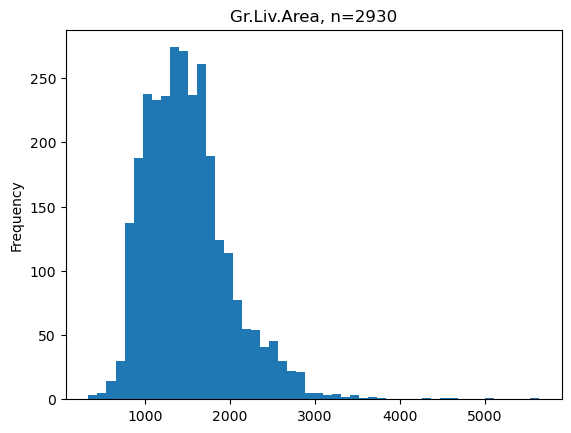

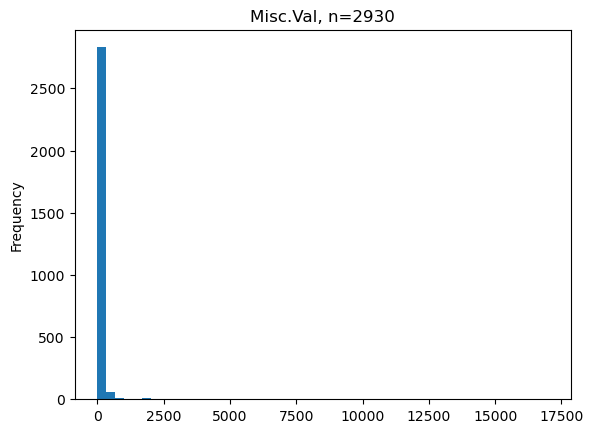

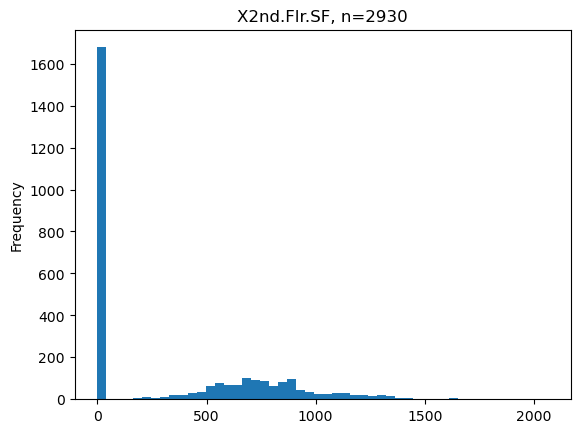

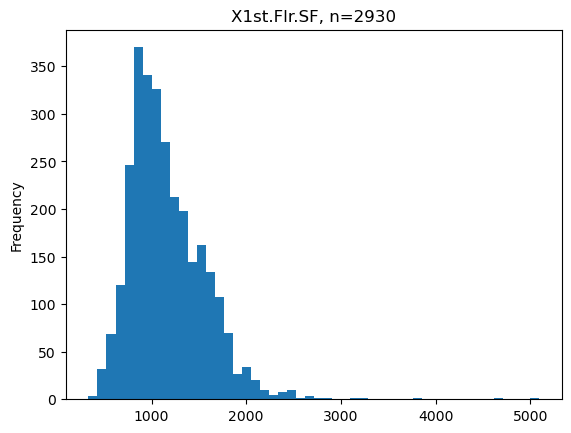

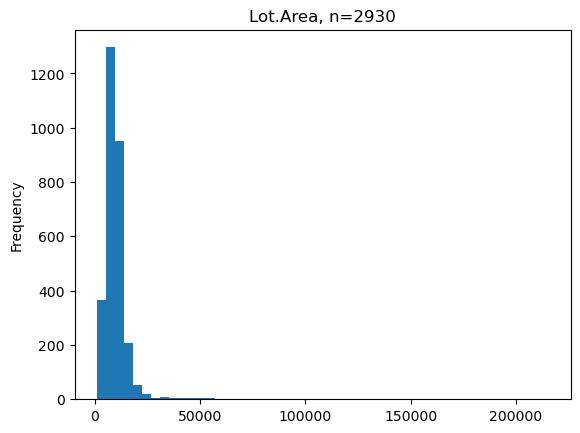

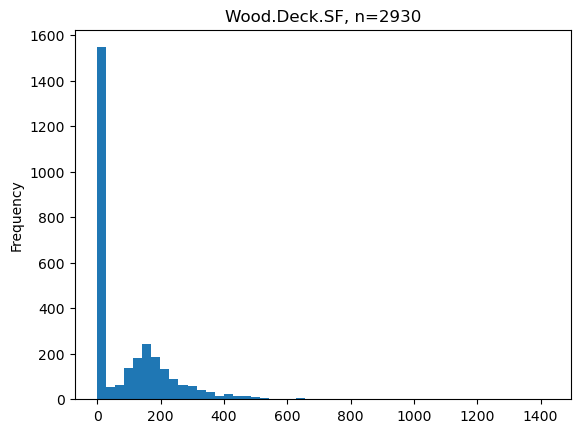

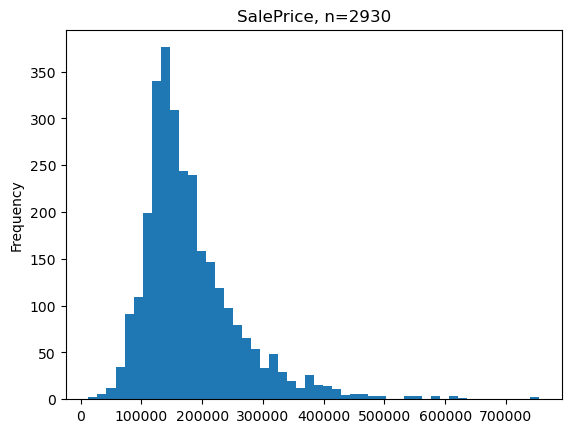

In [28]:
for col, val in summary['count'].items():
    plt.figure()
    data[col].plot.hist(bins=50)
    plt.title(f'{col}, n={int(val)}')
    plt.show()